# Cluster Spotify Data using K-Prototypes (Mix between K-means and K-modes)
The data has 19 features. 3 categorical features and 10 continuous features will be used for modeling while the other features that have IDs and track location data will need to be scrubbed. 

The data is easy to use and without misssing values

In [1]:
import pandas as pd
rawData = pd.read_csv('spotifyLibraryNames.csv')
list(rawData.columns)

['Unnamed: 0',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature',
 'songName']

In [2]:
rawData.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1.597000e+03,1597.000000
mean,798.000000,0.693568,0.635788,5.162179,-6.849644,0.551659,0.159679,0.173665,0.046213,0.190978,0.440894,124.637242,2.191201e+05,3.974953
std,461.158505,0.145726,0.159213,3.629885,2.429829,0.497480,0.131423,0.196928,0.157516,0.141775,0.223163,27.358687,5.718740e+04,0.261332
min,0.000000,0.157000,0.109000,0.000000,-21.447000,0.000000,0.024400,0.000025,0.000000,0.016000,0.026600,55.679000,5.564000e+04,1.000000
25%,399.000000,0.597000,0.531000,1.000000,-8.136000,0.000000,0.051900,0.025000,0.000000,0.101000,0.265000,103.332000,1.860040e+05,4.000000
50%,798.000000,0.707000,0.637000,5.000000,-6.571000,1.000000,0.107000,0.095000,0.000004,0.134000,0.420000,125.993000,2.133330e+05,4.000000
75%,1197.000000,0.805000,0.749000,8.000000,-5.205000,1.000000,0.251000,0.259000,0.001450,0.238000,0.600000,142.131000,2.461730e+05,4.000000
max,1596.000000,0.980000,0.994000,11.000000,-0.283000,1.000000,0.855000,0.944000,0.973000,0.966000,0.980000,215.593000,1.146163e+06,5.000000


# Data Cleaning

In [2]:
#remove unnecessary data like id and song name (not needed in modeling)
rawDataVals = [x for x in rawData.columns if x not in ['n','type', 'id','Unnamed: 0','uri', 'track_href', 'analysis_url']]
rawDataDF = rawData[rawDataVals].set_index(rawData.id)

In [3]:
#rawDataScrubedVals

In [4]:
rawDataDF

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,songName
id,,,,,,,,,,,,,,
4s7QLoImIwmPi9L6dq1nVW,0.568,0.560,9,-9.059,1,0.4200,0.22800,0.000003,0.3900,0.246,130.019,308756,4,TSU
7f1w2rZoIf7g56McEUTh5W,0.700,0.572,4,-6.459,1,0.0515,0.45300,0.000000,0.0871,0.686,109.985,297000,4,Jail pt 2
42ZrMq4BKsWDrrbMnMRYaK,0.458,0.571,4,-6.739,1,0.0949,0.53500,0.000305,0.0846,0.586,110.013,297000,4,Jail
3SYLoL8KHxdQPYIkfwmUjN,0.792,0.548,4,-7.079,1,0.0820,0.07840,0.000073,0.1670,0.197,110.105,198614,4,Remote Control
73uxnSsFMeJ15POpd3zgrV,0.595,0.656,7,-7.868,1,0.2470,0.14800,0.000000,0.4700,0.416,99.811,242400,4,Believe What I Say
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2rmq49FcJ4U3wh1Z7C9UxE,0.644,0.479,4,-8.352,1,0.1770,0.16900,0.000000,0.6390,0.612,79.929,180680,4,IV. Sweatpants
3Z2sglqDj1rDRMF5x0Sz2R,0.473,0.461,6,-6.474,0,0.3330,0.14900,0.000000,0.0973,0.615,165.985,234213,4,3005
14Rcq31SafFBHNEwXrtR2B,0.776,0.413,6,-7.438,0,0.0952,0.00415,0.000027,0.0724,0.287,100.003,227880,4,"Hold On, We're Going Home"


## Fixed skewed data and use minmax transformations for continous data. 

In [5]:
#if skew is above abs(.75)
skew_columns = abs(rawDataDF.skew()).sort_values(ascending=False)
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

time_signature      4.491702
instrumentalness    3.987713
duration_ms         3.509950
liveness            1.976394
acousticness        1.458378
speechiness         1.152876
loudness            0.935414
dtype: float64

## fixed skewed columns

Used a combination of boxcox and log transformations to find the the best distributions

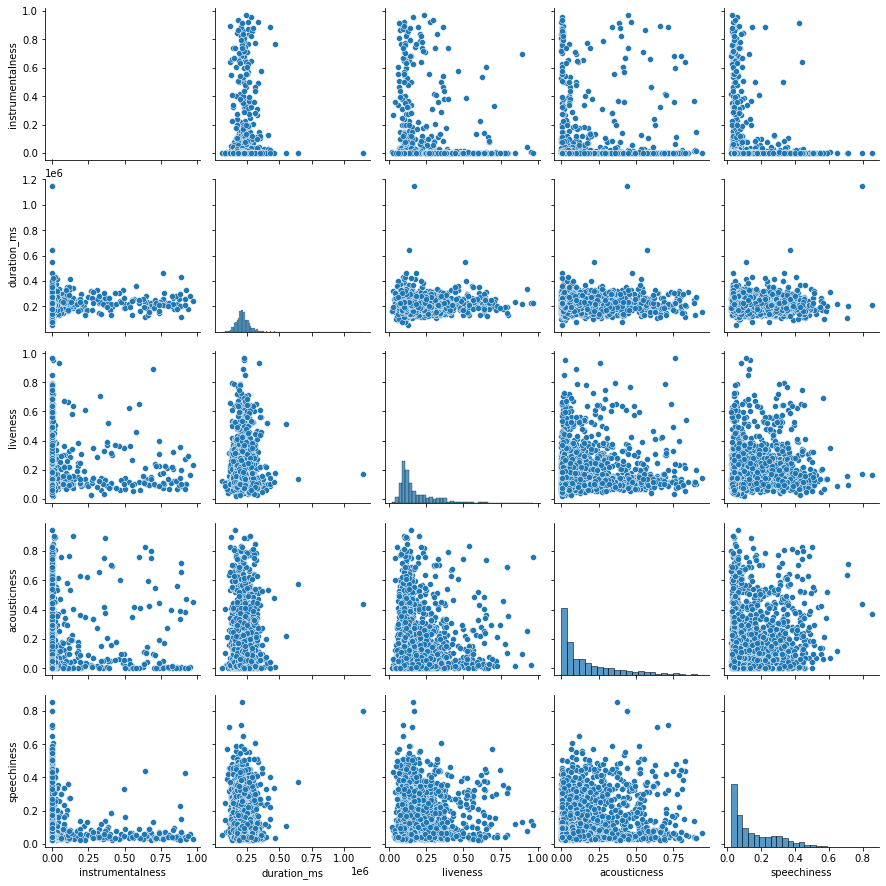

In [6]:
import seaborn as sns

skew_data = ['instrumentalness','duration_ms','liveness','acousticness','speechiness']
sns.pairplot(rawDataDF[skew_data])

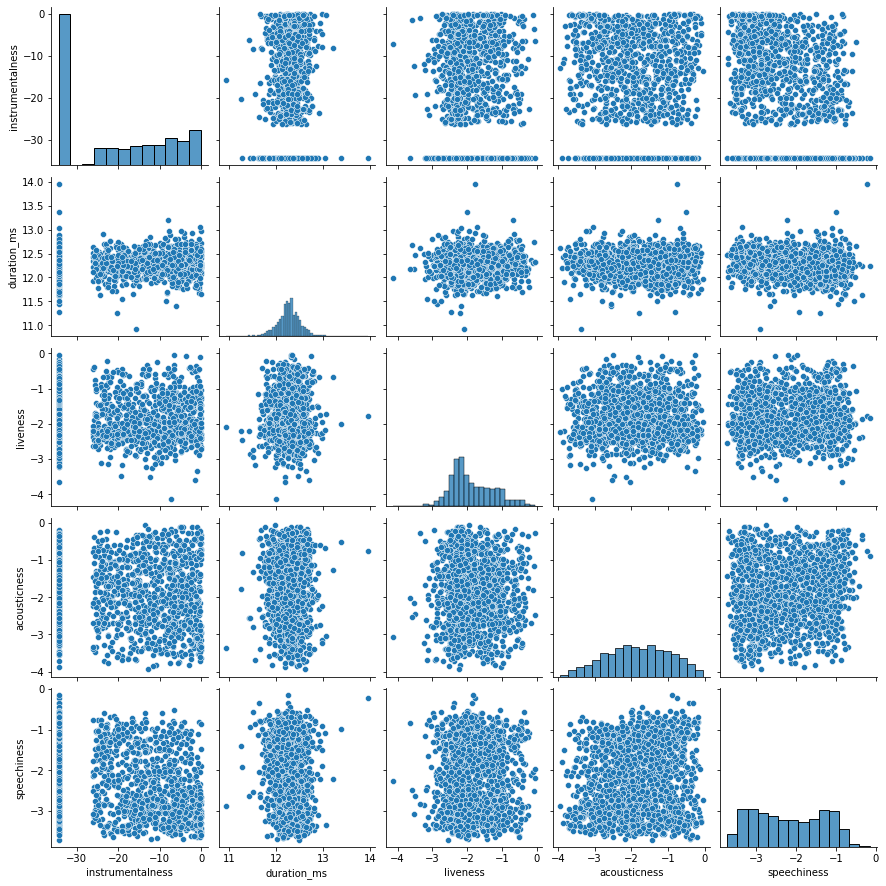

In [7]:
import numpy as np
from scipy import stats

#t_data_df will be the transformed data for addressing skewness
t_data_df = rawDataDF.copy()
#(numeric_data_df.instrumentalness).unique().size
#np.sqrt(numeric_data_df.instrumentalness).hist()
t_data_df['instrumentalness'] = t_data_df['instrumentalness'].replace(0,0.0000001)
t_data_df['instrumentalness'] = stats.boxcox(t_data_df['instrumentalness'])[0]
t_data_df['duration_ms'] = np.log(t_data_df['duration_ms'])
t_data_df['liveness'] = np.log(t_data_df['liveness'])
t_data_df['acousticness'] = stats.boxcox(t_data_df['acousticness'])[0]
t_data_df['speechiness'] = np.log(t_data_df['speechiness'])

import seaborn as sns

skew_data = ['instrumentalness','duration_ms','liveness','acousticness','speechiness']
sns.pairplot(t_data_df[skew_data])

## scale features
use MinMaxScaler to scale continous features

In [8]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
t_data_df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']] = sc.fit_transform(t_data_df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']])
# scaledFeatures_df = pd.DataFrame(scaledFeatures, index=t_data_df.index, columns=t_data_df.columns)
# scaledFeatures_df
t_data_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,songName
id,,,,,,,,,,,,,,
4s7QLoImIwmPi9L6dq1nVW,0.499392,0.509605,9,0.585334,1,0.800128,0.692443,0.337646,0.778807,0.230124,0.464875,0.566444,4,TSU
7f1w2rZoIf7g56McEUTh5W,0.659781,0.523164,4,0.708184,1,0.210037,0.828457,0.000000,0.413227,0.691630,0.339595,0.553613,4,Jail pt 2
42ZrMq4BKsWDrrbMnMRYaK,0.365735,0.522034,4,0.694954,1,0.381902,0.864809,0.662591,0.406125,0.586742,0.339770,0.553613,4,Jail
3SYLoL8KHxdQPYIkfwmUjN,0.771567,0.496045,4,0.678889,1,0.340821,0.519623,0.574524,0.571970,0.178729,0.340345,0.420610,4,Remote Control
73uxnSsFMeJ15POpd3zgrV,0.532199,0.618079,7,0.641608,1,0.650863,0.617296,0.000000,0.824310,0.408433,0.275973,0.486464,4,Believe What I Say
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2rmq49FcJ4U3wh1Z7C9UxE,0.591738,0.418079,4,0.618739,1,0.557165,0.639574,0.000000,0.899219,0.614013,0.151644,0.389329,4,IV. Sweatpants
3Z2sglqDj1rDRMF5x0Sz2R,0.383961,0.397740,6,0.707475,0,0.734865,0.618410,0.000000,0.440233,0.617160,0.689783,0.475107,4,3005
14Rcq31SafFBHNEwXrtR2B,0.752126,0.343503,6,0.661926,0,0.382789,0.215629,0.506776,0.368148,0.273128,0.277174,0.466046,4,"Hold On, We're Going Home"


# K-Prototypes

"The first clustering method we will try is called K-Prototypes. This algorithm is essentially a cross between the K-means algorithm and the K-modes algorithm."

https://medium.com/analytics-vidhya/clustering-on-mixed-data-types-in-python-7c22b3898086

In [9]:
print(list(t_data_df.columns))
data = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',]

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'songName']


In [14]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=7, init='Cao')
kproto = kproto.fit(t_data_df[data],categorical=[2,4,12])
# clusters = kproto.fit_predict(t_data_df, categorical=[2,4,12])

t_data_df['kproto'] = kproto.predict(t_data_df[data],categorical=[2,4,12])
t_data_df.groupby(['kproto']).size()

kproto
0    302
1    233
2    210
3    304
4    161
5    183
6    204
dtype: int64

In [15]:
#t_data_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,songName,kproto
id,,,,,,,,,,,,,,,
4s7QLoImIwmPi9L6dq1nVW,0.499392,0.509605,9,0.585334,1,0.800128,0.692443,0.337646,0.778807,0.230124,0.464875,0.566444,4,TSU,0
7f1w2rZoIf7g56McEUTh5W,0.659781,0.523164,4,0.708184,1,0.210037,0.828457,0.000000,0.413227,0.691630,0.339595,0.553613,4,Jail pt 2,2
42ZrMq4BKsWDrrbMnMRYaK,0.365735,0.522034,4,0.694954,1,0.381902,0.864809,0.662591,0.406125,0.586742,0.339770,0.553613,4,Jail,4
3SYLoL8KHxdQPYIkfwmUjN,0.771567,0.496045,4,0.678889,1,0.340821,0.519623,0.574524,0.571970,0.178729,0.340345,0.420610,4,Remote Control,4
73uxnSsFMeJ15POpd3zgrV,0.532199,0.618079,7,0.641608,1,0.650863,0.617296,0.000000,0.824310,0.408433,0.275973,0.486464,4,Believe What I Say,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2rmq49FcJ4U3wh1Z7C9UxE,0.591738,0.418079,4,0.618739,1,0.557165,0.639574,0.000000,0.899219,0.614013,0.151644,0.389329,4,IV. Sweatpants,0
3Z2sglqDj1rDRMF5x0Sz2R,0.383961,0.397740,6,0.707475,0,0.734865,0.618410,0.000000,0.440233,0.617160,0.689783,0.475107,4,3005,3
14Rcq31SafFBHNEwXrtR2B,0.752126,0.343503,6,0.661926,0,0.382789,0.215629,0.506776,0.368148,0.273128,0.277174,0.466046,4,"Hold On, We're Going Home",1


danceability
energy
loudness
speechiness
acousticness
valence


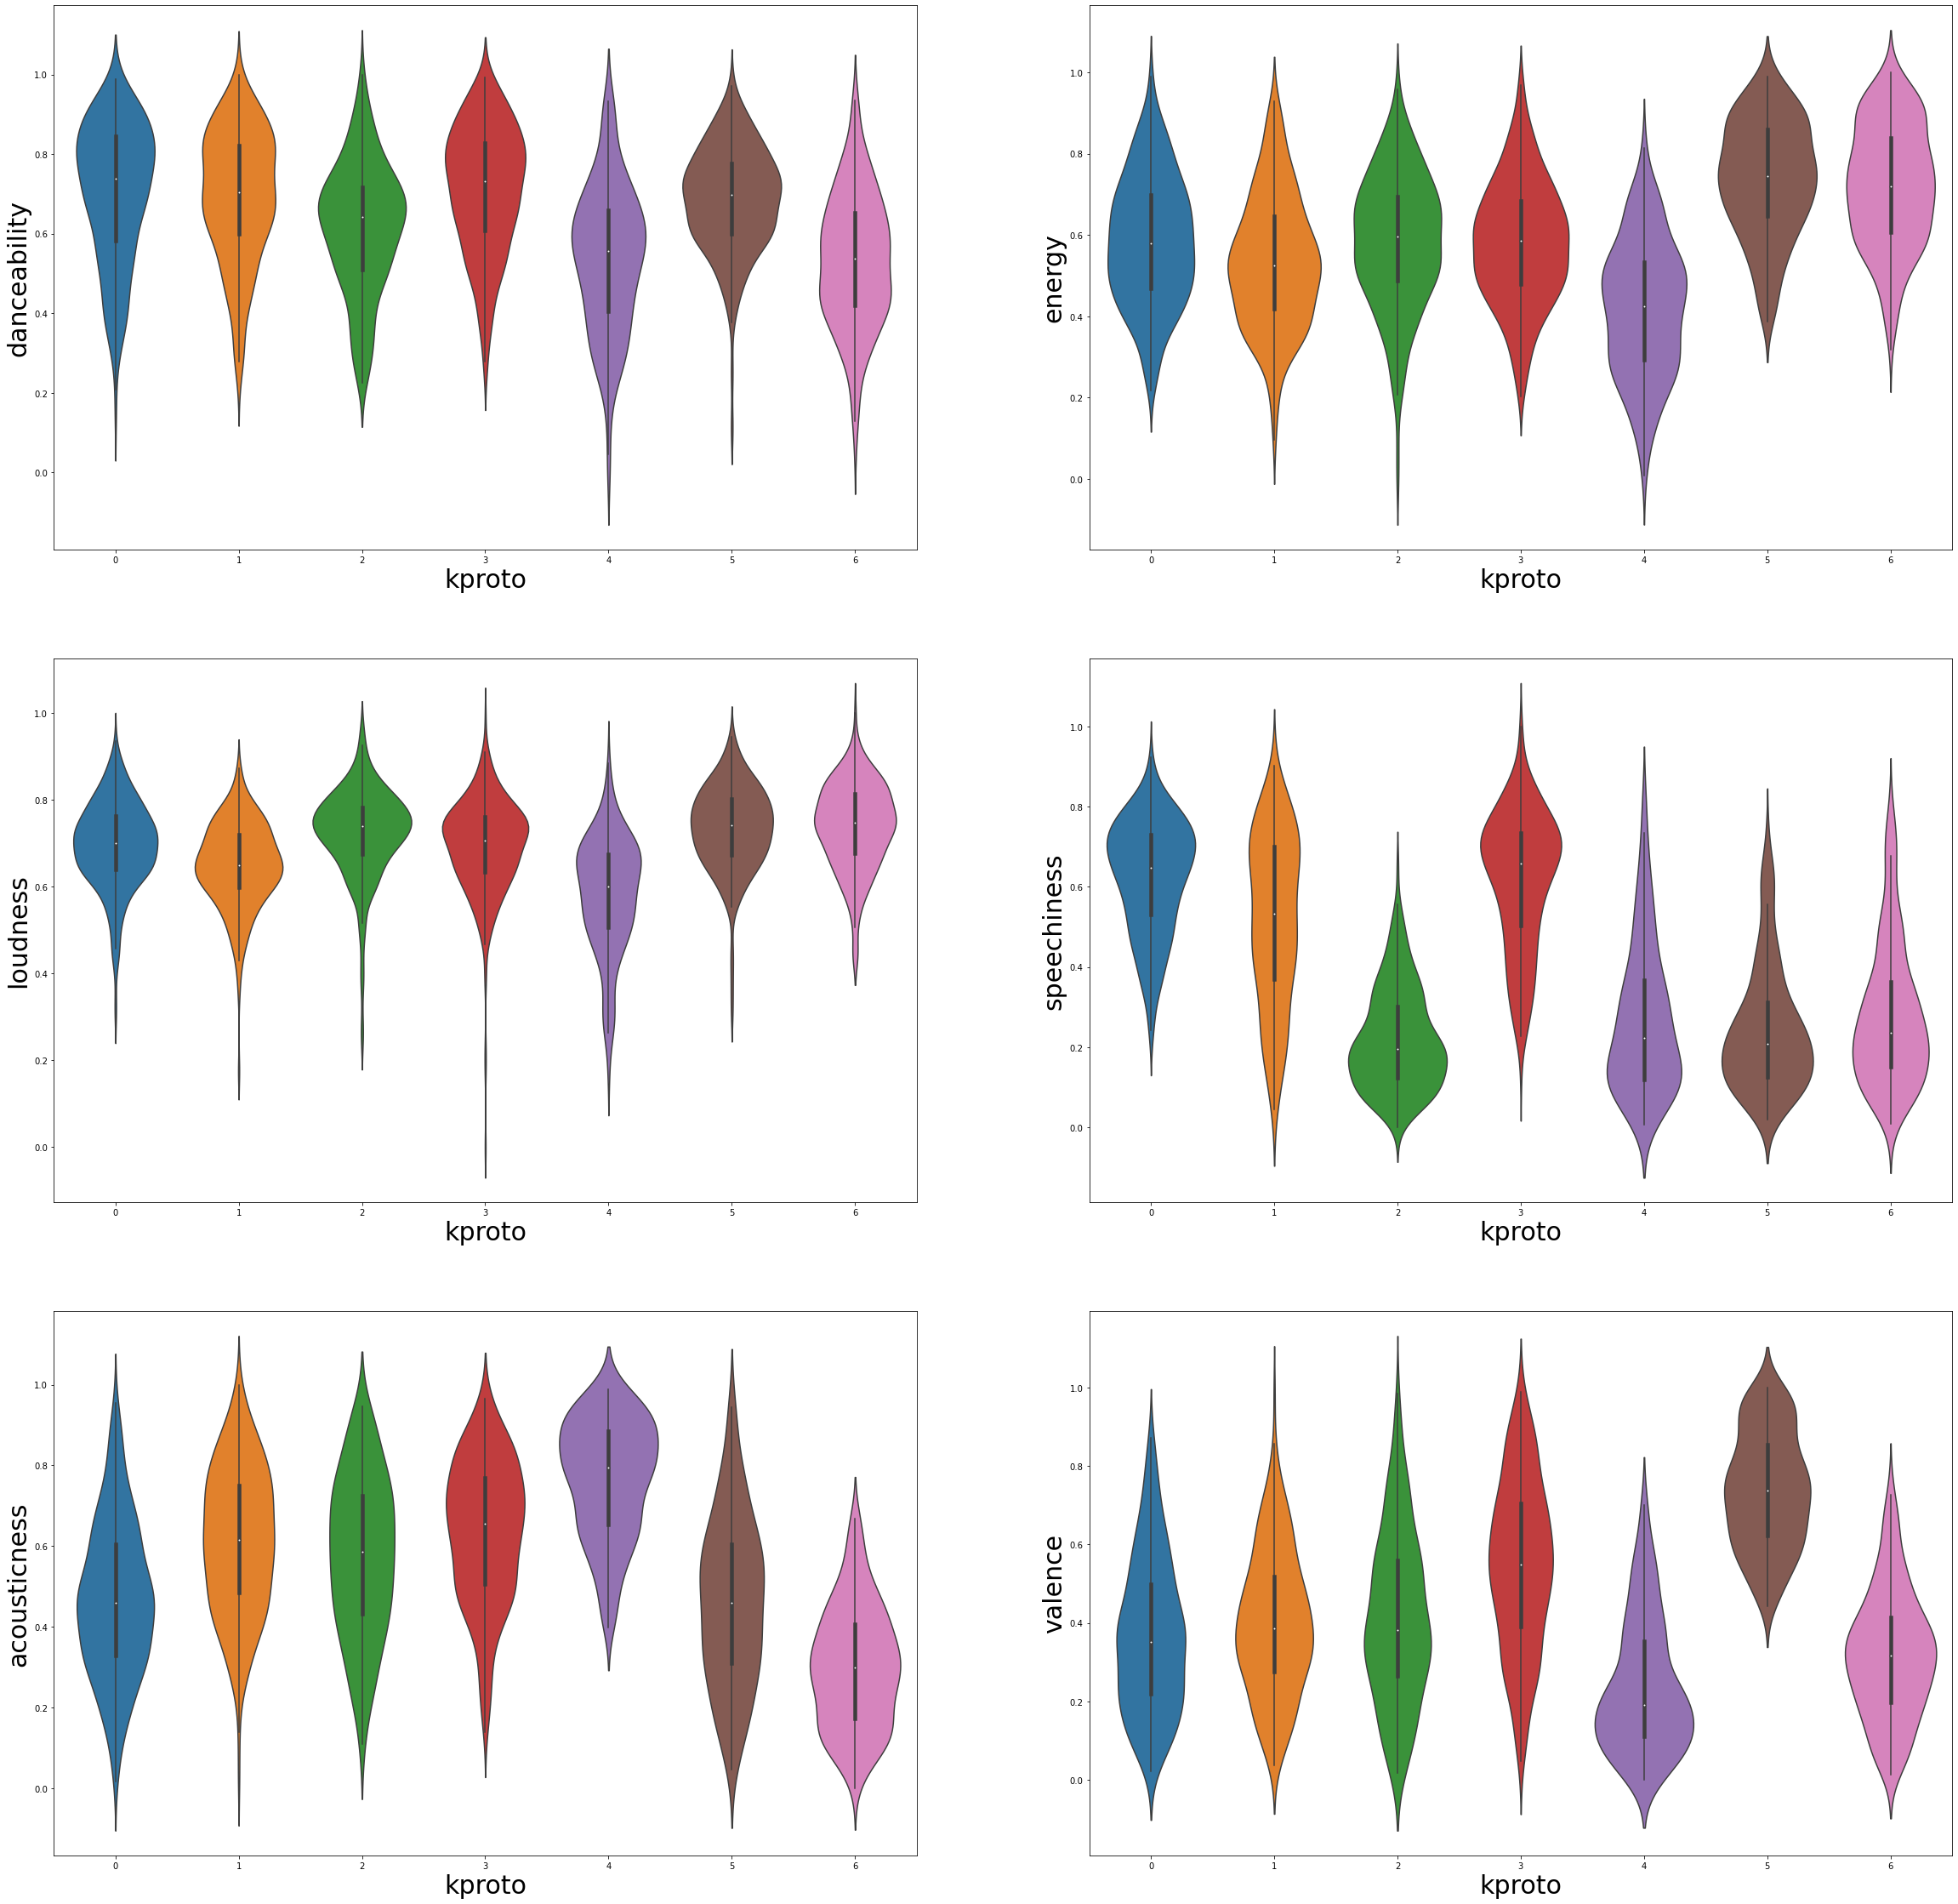

In [31]:
#vibe plots
#cant get last plot to update label size
valueData = ['danceability','energy','loudness','speechiness','acousticness','valence']
valueDataDF = t_data_df[valueData]

import matplotlib.pyplot as plt

#sample = labeledSongs.sample(frac = .9)

plt.figure(figsize=(40,40))

x_size,y_size = 30,30
plt.rcParams.update({'font.size':10 })

#plt.xticks(fontsize= 200)
#enumerate will iterate through a dataframes column names
for i in list((enumerate(valueDataDF))):
    plt.subplot(3,2,(i[0]+1))
    axes = plt.gca()
    axes.xaxis.label.set_size(x_size)
    axes.yaxis.label.set_size(y_size)
    print(i[0+1])
    sns.violinplot(y=i[1], x='kproto', data = t_data_df)


In [16]:
#export df to use for NLP to help name playlists
t_data_df.to_csv("C:\\Users\\jbaskerville\\Desktop\\JohnBaskervilleGitRepos\\SpotifyClustering\\Juypter Notebooks\\songDataKProto.csv", encoding='utf-8')

In [21]:
list((enumerate(valueDataDF)))

[(0, 'danceability'),
 (1, 'energy'),
 (2, 'loudness'),
 (3, 'speechiness'),
 (4, 'acousticness'),
 (5, 'valence')]